In [128]:
import networkx as nx
import sys
import isort
import importlib
from types import ModuleType


In [129]:
G = nx.Graph()

In [130]:
def get_stdlib_packages():
    if sys.version_info.minor == 10:
        module_names = sys.stdlib_module_names
    else:
        module_names = isort.stdlibs.py38.stdlib

    external_packages = list()
    for name in module_names:
        if name[0] == '_' or name == 'this' or name == 'antigravity':
            continue
        external_packages.append(name)
    return external_packages

def get_real_packages(package_names):
    real_modules = list()
    not_importable_modules = list()
    for name in package_names:
        try:
            importlib.import_module(name)
            real_modules.append(name)
        except:
            not_importable_modules.append(name)
    return real_modules, not_importable_modules


def get_real():
    external_packages = get_stdlib_packages()
    return get_real_packages(external_packages)

In [131]:
real_modules, _ = get_real()

In [132]:
def module_dependency(module_names, name):
    if name not in module_names:
        raise Exception(f'{name} is not importable module')
    dp_names = list()

    for key, val in vars(sys.modules[name]).items():
        if isinstance(val, ModuleType):
            md_name = val.__name__

            try:
                index = md_name.index(".")
                md_name = md_name[0:index]
            except:
                pass
                
            if md_name != name:
                dp_names.append(md_name)

    return dp_names

In [133]:
dp = module_dependency(real_modules, 'urllib')
print(dp)

# print(vars(sys.modules['urllib']).items())

[]


In [134]:
def module_dependency_map(modules):
    md_map = dict()
    for md in modules:
        md_map[md] = module_dependency(modules, md)
    return md_map

md_map = module_dependency_map(real_modules)

In [135]:
def build_adj_list(md_map):
    index_list = list()
    edges = list()

    for k, v in md_map.items():
        index_list.append(k)

    n = len(index_list)
    for i in range(n):
        adj_v = md_map[index_list[i]]
        for name in adj_v:
            try:
                j = index_list.index(name)
                edges.append(tuple([i,j]))
            except:
                continue

    return edges, index_list

In [136]:
edges, index_list = build_adj_list(md_map)
print(edges)

[(0, 12), (2, 42), (2, 114), (2, 148), (2, 64), (2, 86), (2, 34), (2, 199), (2, 151), (3, 86), (3, 64), (3, 141), (3, 130), (4, 64), (4, 34), (4, 20), (5, 64), (5, 34), (6, 64), (6, 34), (13, 114), (13, 64), (13, 34), (13, 151), (13, 101), (14, 34), (14, 132), (14, 78), (15, 8), (15, 39), (15, 34), (15, 59), (15, 151), (15, 64), (19, 194), (21, 132), (21, 59), (21, 202), (24, 64), (24, 34), (24, 20), (24, 127), (24, 202), (24, 29), (24, 105), (26, 64), (27, 136), (27, 114), (27, 64), (27, 34), (27, 30), (28, 12), (28, 86), (28, 64), (30, 202), (30, 72), (30, 180), (30, 34), (31, 191), (31, 100), (31, 75), (33, 127), (33, 180), (33, 64), (33, 67), (35, 64), (35, 43), (35, 20), (36, 34), (36, 70), (38, 12), (38, 114), (38, 169), (38, 86), (38, 64), (38, 13), (38, 117), (38, 194), (38, 34), (38, 106), (38, 59), (38, 188), (38, 18), (38, 151), (39, 64), (39, 34), (39, 86), (39, 46), (39, 29), (40, 194), (40, 34), (40, 25), (40, 199), (40, 169), (40, 192), (40, 12), (40, 150), (42, 34), (42

In [137]:
print(md_map)

{'reprlib': ['builtins'], 'faulthandler': [], 'modulefinder': ['dis', 'importlib', 'marshal', 'os', 'io', 'sys', 'types', 'warnings'], 'binhex': ['io', 'os', 'struct', 'binascii'], 'posixpath': ['os', 'sys', 'stat', 'genericpath'], 'threading': ['os', 'sys'], 'curses': ['os', 'sys'], 'token': [], 'select': [], 'syslog': [], 'grp': [], 'lib2to3': [], 'builtins': [], 'pkgutil': ['importlib', 'os', 'sys', 'warnings', 'zipimport'], 'calendar': ['sys', 'datetime', 'locale'], 'asyncore': ['select', 'socket', 'sys', 'time', 'warnings', 'os'], 'cmath': [], 'spwd': [], 'urllib': [], 'html': ['re'], 'stat': [], 'sqlite3': ['datetime', 'time', 'collections'], 'contextvars': [], 'symbol': [], 'shutil': ['os', 'sys', 'stat', 'fnmatch', 'collections', 'errno', 'posix'], 'copy': [], 'getopt': ['os'], 'py_compile': ['enum', 'importlib', 'os', 'sys', 'traceback'], 'lzma': ['builtins', 'io', 'os', '_compression'], 'errno': [], 'traceback': ['collections', 'itertools', 'linecache', 'sys'], 'statistics': 

In [138]:
# G.add_edges_from(edges)

In [139]:
# print(len(list(G.nodes)))

In [140]:
DG = nx.DiGraph(edges)

In [141]:
# print(len(list(DG.nodes)))

In [142]:
sorted(nx.simple_cycles(DG))

[[64, 4]]

In [143]:
print(index_list[64], index_list[4])


os posixpath


In [144]:
import os
import posixpath

print(md_map)

{'reprlib': ['builtins'], 'faulthandler': [], 'modulefinder': ['dis', 'importlib', 'marshal', 'os', 'io', 'sys', 'types', 'warnings'], 'binhex': ['io', 'os', 'struct', 'binascii'], 'posixpath': ['os', 'sys', 'stat', 'genericpath'], 'threading': ['os', 'sys'], 'curses': ['os', 'sys'], 'token': [], 'select': [], 'syslog': [], 'grp': [], 'lib2to3': [], 'builtins': [], 'pkgutil': ['importlib', 'os', 'sys', 'warnings', 'zipimport'], 'calendar': ['sys', 'datetime', 'locale'], 'asyncore': ['select', 'socket', 'sys', 'time', 'warnings', 'os'], 'cmath': [], 'spwd': [], 'urllib': [], 'html': ['re'], 'stat': [], 'sqlite3': ['datetime', 'time', 'collections'], 'contextvars': [], 'symbol': [], 'shutil': ['os', 'sys', 'stat', 'fnmatch', 'collections', 'errno', 'posix'], 'copy': [], 'getopt': ['os'], 'py_compile': ['enum', 'importlib', 'os', 'sys', 'traceback'], 'lzma': ['builtins', 'io', 'os', '_compression'], 'errno': [], 'traceback': ['collections', 'itertools', 'linecache', 'sys'], 'statistics': 

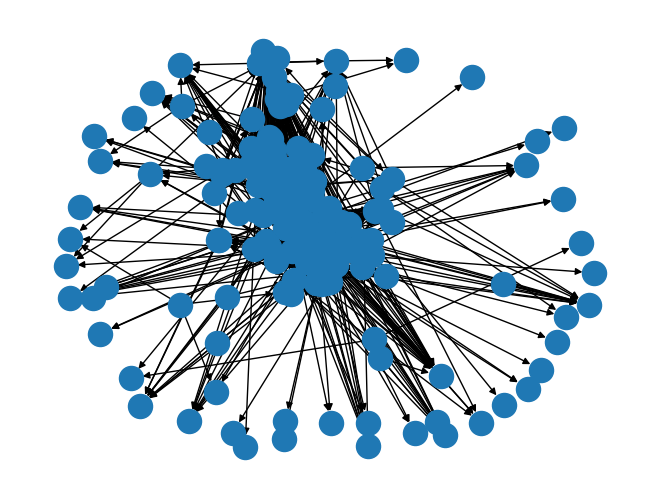

In [146]:
import matplotlib
nx.draw(DG)

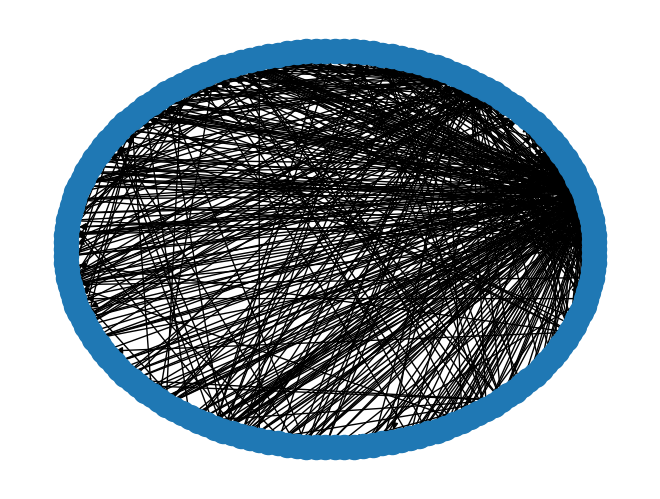

In [147]:
nx.draw_circular(DG)